In [6]:
from statsmodels import api as sm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as manimation

plt.style.use('seaborn-poster')
%matplotlib inline

In [21]:
def nextpow2(i):
    '''
    Find the next power 2 number for FFT
    '''
    
    n = 1
    while n < i: n *= 2
    return n

def shift_signal_in_frequency_domain(datin, shift):
    '''
    This is function to shift a signal in frequency domain. 
    The idea is in the frequency domain, 
    we just multiply the signal with the phase shift. 
    '''
    Nin = len(datin) 
    
    # get the next power 2 number for fft
    N = nextpow2(Nin +np.max(np.abs(shift)))
    
    # do the fft
    fdatin = np.fft.fft(datin, N)
    
    # get the phase shift for the signal, shift here is D in the above explaination
    ik = np.array([2j*np.pi*k for k in range(0, N)]) / N 
    fshift = np.exp(-ik*shift)
        
    # multiple the signal with the shift and transform it back to time domain
    datout = np.real(np.fft.ifft(fshift * fdatin))
    
    # only get the data have the same length as the input signal
    datout = datout[0:Nin]
    
    return datout

In [8]:
import pandas as pd
df = pd.read_csv('Synthetic Dataset.csv')

In [9]:
y = df['Values'].values

In [10]:
# get the autocorrelation coefficient
acf = sm.tsa.acf(y, nlags=len(y))

Text(0, 0.5, 'Autocorrelation')

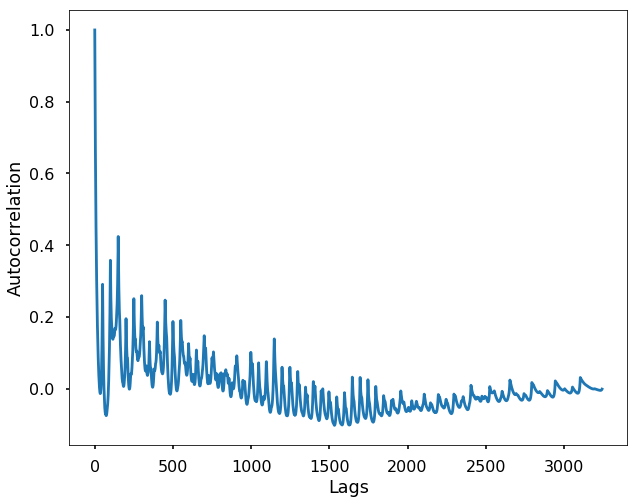

In [11]:
plt.figure(figsize = (10, 8))
lag = np.arange(len(y))
plt.plot(lag, acf)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

In [23]:
FFMpegWriter = manimation.writers['pillow']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)


In [15]:
Fs = 1  # sampling rate
Ts = 1.0/Fs # sampling interval
t = np.arange(0,len(y),Ts) # time vector
ff = 0.1;   # frequency of the signal

In [14]:
fs = 1
fx = 1.0/fs
fx

1.0

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


ValueError: unknown file extension: .mp4

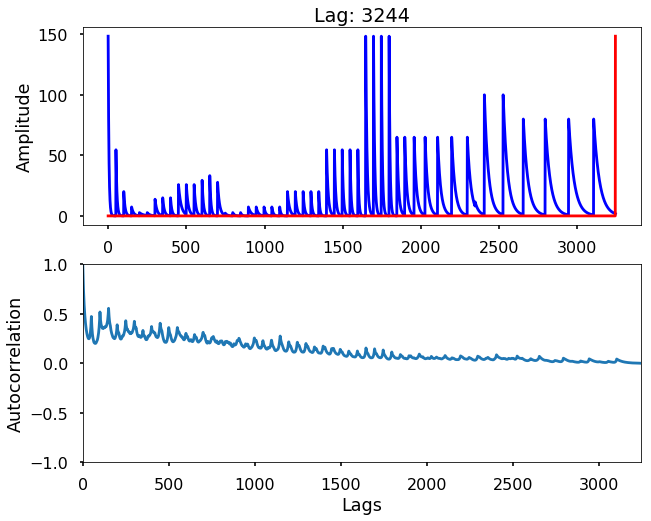

In [27]:
lags = []
acfs = []
norm = np.dot(y, y)
fig = plt.figure(figsize = (10, 8))
n_frame = len(y)

def updatefig(i):
    '''
    a simple helper function to plot the two figures we need, 
    the top panel is the time domain signal with the red signal
    showing the shifted signal. The bottom figure is the one
    corresponding to the autocorrelation from the above figure. 
    '''
    fig.clear()
    # shift signal
    y_shift = shift_signal_in_frequency_domain(y, i)
    plt.subplot(211)
    plt.plot(t, y, 'b')
    plt.plot(t, y_shift, 'r')
    plt.ylabel('Amplitude')
    plt.title('Lag: ' + str(i))

    plt.subplot(212)
    # get the lag
    lags.append(i)
    # simple way to calculate autocorrelation
    acf = np.dot(y_shift, y)
    # add to the list with normalized value. 
    acfs.append(acf/norm)
    plt.plot(lags, acfs)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.xlim(0, n_frame)
    plt.ylim(-1, 1)
    plt.draw()

# save the movie to file
anim = manimation.FuncAnimation(fig, updatefig, n_frame)
anim.save("./autocorrelation_example.mp4", fps=10, dpi = 300)

Text(0, 0.5, 'Amplitude')

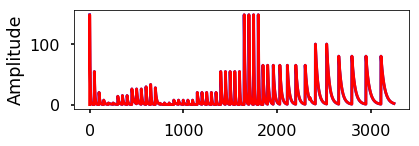

In [22]:
y_shift = shift_signal_in_frequency_domain(y, 1)
plt.subplot(211)
plt.plot(t, y, 'b')
plt.plot(t, y_shift, 'r')
plt.ylabel('Amplitude')
#plt.title('Lag: ' + str(i))